## Project Phase 3 - Avoid False Discoveries

#### Import modules

In [1]:
from pathlib import Path
import os
import sys
import time
import warnings

import pandas as pd

In [2]:
path = Path(os.getcwd())
path = str(path)
print(path)
sys.path.insert(1, path)

/Users/leon/Documents/Repos/Gesture-Recognition-Reading-Muscle-Activity


In [3]:
from utils import validation
import utils.clustering as clustering

In [4]:
warnings.filterwarnings("ignore")

#### Set up to time script run time

In [5]:
start = time.time()

#### Configuration

In [6]:
RANDOM_SEED = 42
SOLUTION_PICKLE_FILE_PATH = 'data/optimization_results.pkl'

AFD_CHECK_NUM = 4
RANDOM_DATA_SETS_NUM = 20

#### The optimization results from clustering pipeline optimization

In [7]:
clustering_results_df: pd.DataFrame = pd.read_pickle(SOLUTION_PICKLE_FILE_PATH)
clustering_results_df.reset_index(drop=True, inplace=True)
clustering_results_df

,algo,eps,dbscan_min_samples,n_clusters_found,validity_index,hopkins_statistic,umap_n_neighbors,umap_min_dist,umap_metric,umap_n_components,trustworthiness,fitted_dbscan,embedding,cluster_labels,n_clusters_db_score_is_min,n_clusters_ch_score_is_max,n_clusters_silhouette_score_is_max,silhouette_score,fitted_k_means
0,k_means,NaN,NaN,3,NaN,0.734961,7,0.00100,cosine,5,0.823645,NaN,"[[3.2748647, 7.6493006, 3.9626865, 4.479932, 6...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",3.0,3.0,3.0,0.549104,"KMeans(n_clusters=3, n_init='auto', random_sta..."
1,k_means,NaN,NaN,3,NaN,0.761623,7,0.00100,cosine,10,0.823610,NaN,"[[3.227192, 7.637264, 3.9158268, 4.851348, 6.4...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",3.0,3.0,3.0,0.549001,"KMeans(n_clusters=3, n_init='auto', random_sta..."
2,k_means,NaN,NaN,3,NaN,0.760266,7,0.00001,cosine,10,0.824708,NaN,"[[3.2835078, 7.658021, 3.8094757, 4.7666316, 6...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",3.0,3.0,3.0,0.548391,"KMeans(n_clusters=3, n_init='auto', random_sta..."
3,k_means,NaN,NaN,3,NaN,0.763695,7,0.00001,cosine,15,0.824834,NaN,"[[3.2331347, 7.6844172, 3.920934, 4.8214865, 6...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",3.0,3.0,3.0,0.547967,"KMeans(n_clusters=3, n_init='auto', random_sta..."
4,k_means,NaN,NaN,3,NaN,0.736636,7,0.00001,cosine,5,0.823768,NaN,"[[3.161631, 7.5509453, 3.8223517, 4.6232133, 6...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",3.0,3.0,3.0,0.545115,"KMeans(n_clusters=3, n_init='auto', random_sta..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,dbscan,0.115614,6.0,3,-0.736907,0.453044,42,0.10000,euclidean,2,0.593051,"DBSCAN(eps=0.1156137251191497, min_samples=6)","[[-0.36745512, 7.3653316], [-0.5968582, 7.0834...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",NaN,NaN,NaN,NaN,NaN
146,dbscan,0.152404,6.0,3,-0.743036,0.424897,17,0.10000,cosine,2,0.750826,"DBSCAN(eps=0.1524039997582118, min_samples=6)","[[2.2316277, 0.73641324], [2.1696315, 0.589929...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN,NaN,NaN,NaN,NaN
147,dbscan,0.096328,6.0,2,-0.752965,0.449576,42,0.00100,euclidean,2,0.597704,"DBSCAN(eps=0.09632816797667515, min_samples=6)","[[0.5836985, 8.050481], [0.41431034, 7.96385],...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",NaN,NaN,NaN,NaN,NaN
148,dbscan,0.473131,6.0,13,-0.773474,0.332102,3,0.10000,cosine,2,0.755032,"DBSCAN(eps=0.473131018951767, min_samples=6)","[[9.46398, 3.5633922], [9.801375, 2.924061], [...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN,NaN,NaN,NaN,NaN


#### Select the Latent Manifold

In [8]:
best_k_means = None
best_k_means_index = None

if (clustering_results_df['algo'] == 'k_means').any():
    best_k_means, best_k_means_index = clustering.select_best_k_means_from_clustering_results(clustering_results_df)
    
print(best_k_means_index)
best_k_means

0


KMeans(n_clusters=3, n_init='auto', random_state=42)

In [9]:
best_dbscan = None
best_dbscan_index = None

if (clustering_results_df['algo'] == 'dbscan').any():
    best_dbscan, best_dbscan_index = clustering.select_best_dbscan_from_clustering_results(clustering_results_df)
    
print(best_dbscan_index)
best_dbscan

54


DBSCAN(eps=1.0762764937608833, min_samples=6)

In [10]:
best_index = clustering.select_latent_manifold(clustering_results_df, best_k_means_index, best_dbscan_index)
best_index

0

In [11]:
latent_manifold_details = clustering.get_latent_manifold_details(clustering_results_df, best_index)
latent_manifold_details

,number of classes in data set,UMAP n_components,UMAP min_dist,UMAP n_neighbors,UMAP metric,trustworthiness,clustering algorithm,number of clusters found,validity index or silhouette score
0,4,5,0.001,7,cosine,0.823645,k_means,3,0.549104


#### Check distribution of silhouette_score or validity_index

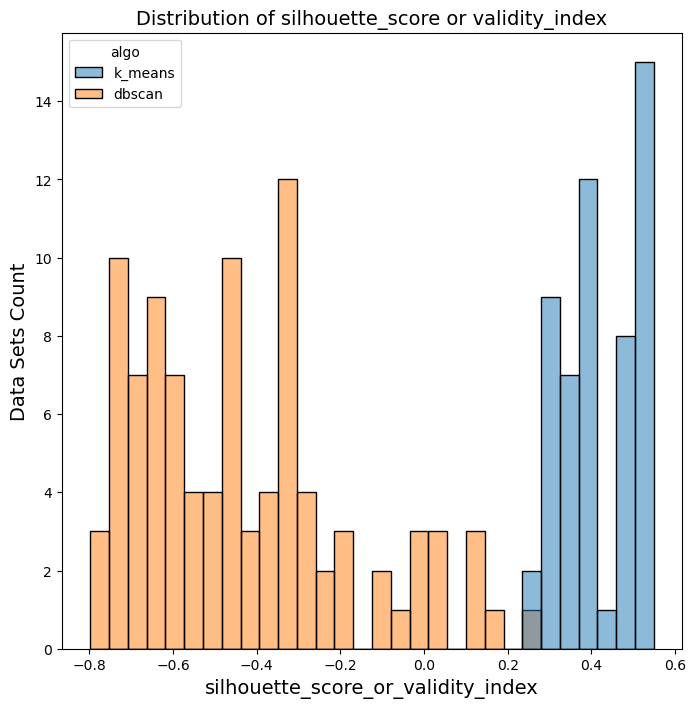

In [12]:
validation.plot_score_hist(clustering_results_df)

#### Silhouette_score analysis for different n_clusters results

In [13]:
# Unique n_clusters list among k-means results
n_clusters_list = sorted(clustering_results_df.loc[clustering_results_df['algo'] == 'k_means', 'n_clusters_found'].unique().tolist())
n_clusters_list

[2, 3, 4]



************************************************************
best_index for n_clusters: 2 is 12
the average silhouette_score is 0.5192729830741882


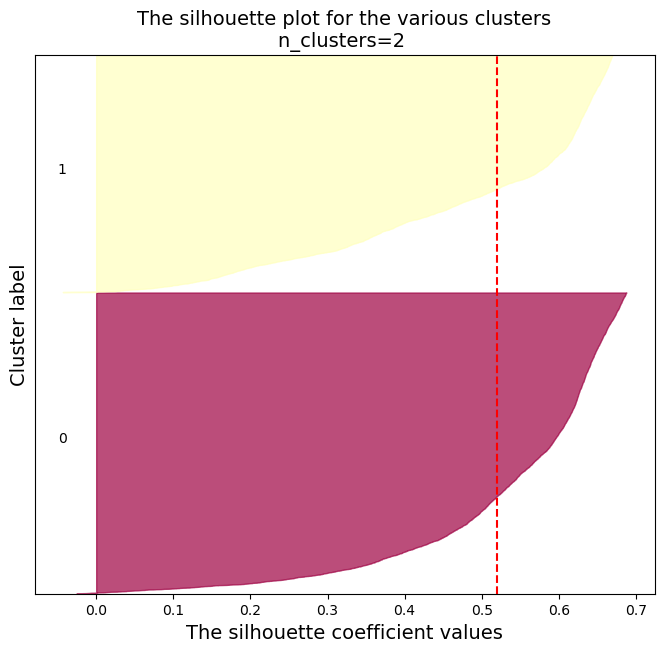



************************************************************
best_index for n_clusters: 3 is 0
the average silhouette_score is 0.5491037368774414


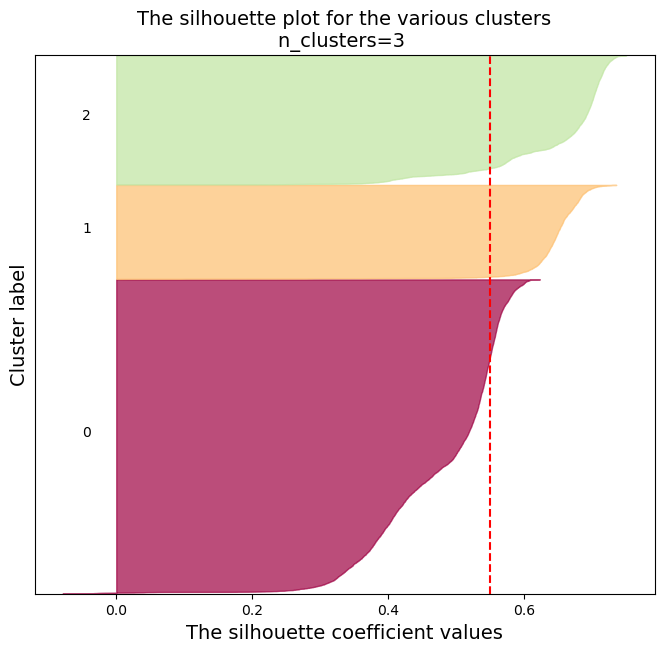



************************************************************
best_index for n_clusters: 4 is 43
the average silhouette_score is 0.32299160957336426


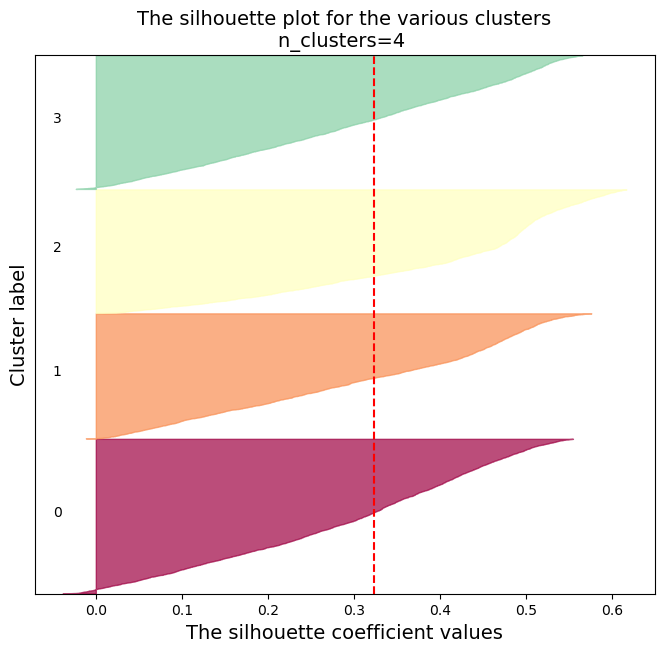

In [14]:
# Choose several n_clusters, plot for the dataset with the highest score 
validation.plot_silhouette_score_analysis(clustering_results_df, n_clusters_list)

#### False discovery checking with randomly distributed data

In [15]:
best_index_list = [clustering_results_df.loc[clustering_results_df['n_clusters_found'] == n_clusters, 'silhouette_score'].idxmax() for n_clusters in n_clusters_list]
best_index_list

[12, 0, 43]

In [16]:
# For comparison, select different entries across the clustering results 
afd_results_df = validation.clustering_randomly_distributed_data(
    clustering_results_df=clustering_results_df,
    afd_check_indices=best_index_list,
    random_data_sets_num=RANDOM_DATA_SETS_NUM,
    random_state=RANDOM_SEED
)
afd_results_df



************************************************************
************************************************************
Getting indices for clustering result 12


************************************************************
Generating randomly distributed data set 0 for clustering result 12 and getting indices
Succeed to find an elbow at 6 in the inertia curve
Elbow slope change test passed
n_clusters_db_score_is_min=6
n_clusters_ch_score_is_max=2
n_clusters_silhouette_score_is_max=2
K-Means first test failed
K-Means second test failed
Would directly use n_clusters at the elbow of inertia curve


************************************************************
Generating randomly distributed data set 1 for clustering result 12 and getting indices
Succeed to find an elbow at 6 in the inertia curve
Elbow slope change test passed
n_clusters_db_score_is_min=15
n_clusters_ch_score_is_max=2
n_clusters_silhouette_score_is_max=2
K-Means first test failed
K-Means second test failed
Would direct

,data_set_name,data_set_type,n_clusters,silhouette_score_or_validity_index
0,clustering_result_12,actual,2,0.519273
1,clustering_result_12,random,8,0.363912
2,clustering_result_12,random,8,0.362279
3,clustering_result_12,random,8,0.358411
4,clustering_result_12,random,8,0.360560
...,...,...,...,...
58,clustering_result_43,random,6,0.374102
59,clustering_result_43,random,4,0.406977
60,clustering_result_43,random,6,0.349460
61,clustering_result_43,random,6,0.346234




************************************************************
clustering_result_12


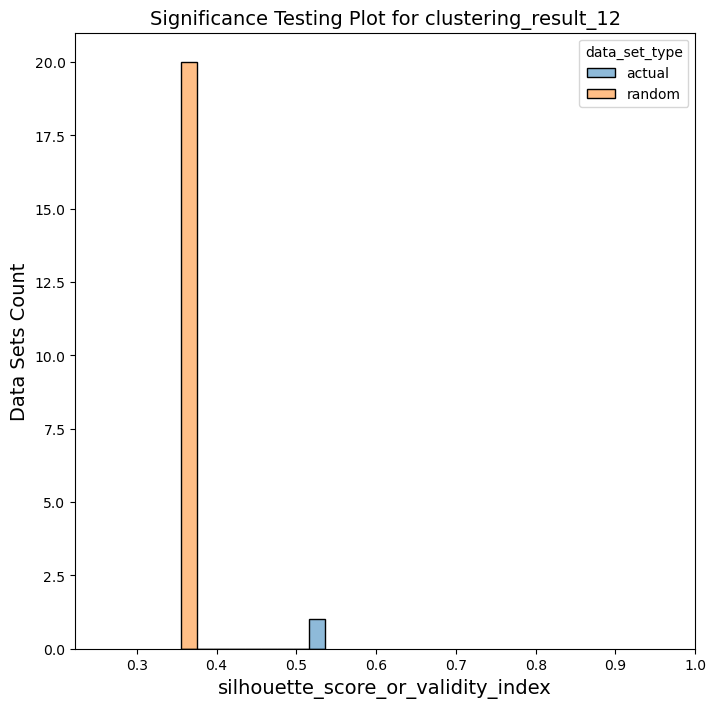



************************************************************
clustering_result_0


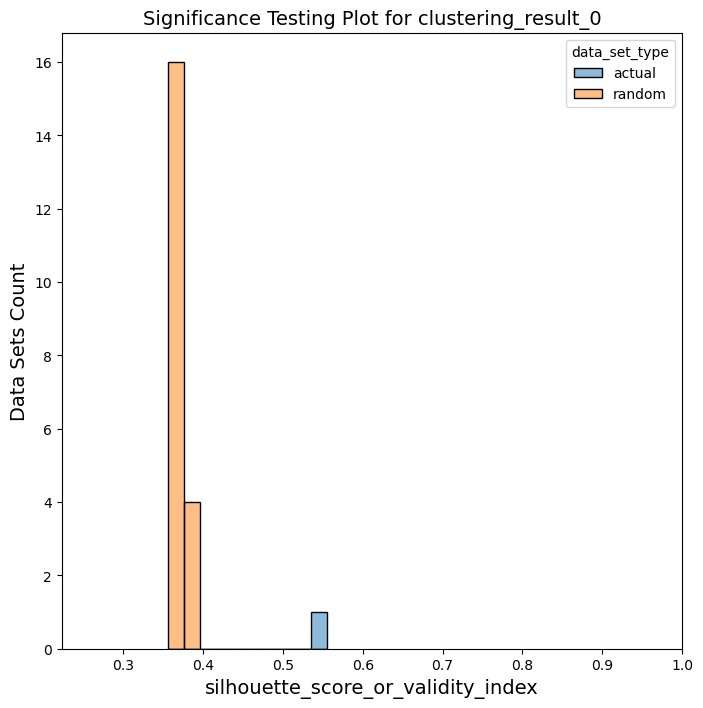



************************************************************
clustering_result_43


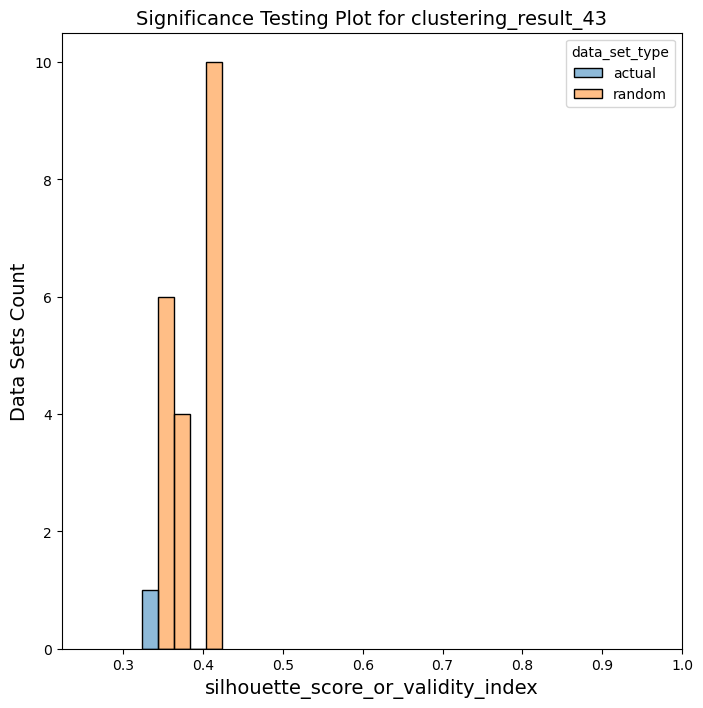

In [17]:
validation.plot_afd_results(afd_results_df)

#### Time to run script

In [18]:
end = time.time()
print(f'script run time: {(end - start)/60} minutes')

script run time: 23.188397602240244 minutes
